In [1]:
import os
import numpy as np
from dipy.data import get_fnames
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.metrics import SSDMetric, CCMetric, EMMetric
import dipy.align.imwarp as imwarp
from dipy.viz import regtools
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline


fname_moving = get_fnames('reg_o')
fname_static = get_fnames('reg_c')



In [2]:
DIR = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK52'
INPUT = os.path.join(DIR, 'preps', 'CH1', 'thumbnail_aligned')
fname_moving = os.path.join(INPUT, '100.tif')
fname_static = os.path.join(INPUT, '200.tif')
moving = io.imread(fname_moving)
static = io.imread(fname_static)

In [3]:
def callback_CC(sdr, status):
    # Status indicates at which stage of the optimization we currently are
    # For now, we will only react at the end of each resolution of the scale
    # space
    if status == imwarp.RegistrationStages.SCALE_END:
        # get the current images from the metric
        wmoving = sdr.metric.moving_image
        wstatic = sdr.metric.static_image
        # draw the images on top of each other with different colors
        regtools.overlay_images(wmoving, wstatic, 'Warped moving', 'Overlay',
                                'Warped static')

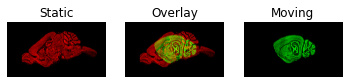

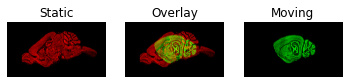

In [4]:
regtools.overlay_images(static, moving, 'Static', 'Overlay', 'Moving')

In [5]:
# this takes a while
dim = static.ndim
metric = SSDMetric(dim)
level_iters = [200, 100, 50, 25]
sdr = SymmetricDiffeomorphicRegistration(metric, level_iters, inv_iter=50)
mapping = sdr.optimize(static, moving)


In [ ]:
regtools.plot_2d_diffeomorphic_map(mapping, 10, 'diffeomorphic_map.png')

In [ ]:
warped_moving = mapping.transform(moving, 'linear')
regtools.overlay_images(static, warped_moving, 'Static', 'Overlay',
                        'Warped moving', 'direct_warp_result.png')

In [ ]:
# Two subplots, unpack the axes array immediately
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True)
fig.set_size_inches(np.array([24, 20]), forward=False)
ax1.imshow(moving, cmap="gray")
ax1.set_title('moving 100')
ax2.imshow(warped_moving, cmap="gray")
ax2.set_title('warped')
ax3.imshow(static, cmap="gray")
ax3.set_title('static 200')


In [ ]:
from dipy.data import get_fnames
from dipy.io.image import load_nifti_data
from dipy.segment.mask import median_otsu

t1_name, b0_name = get_fnames('syn_data')
data = load_nifti_data(b0_name)

In [ ]:
b0_mask, mask = median_otsu(data, median_radius=4, numpass=4)
type(mask)

In [ ]:
mask.shape

In [ ]:
for i in range(0, 10, 1):
    plt.title('Z {}'.format(i))
    plt.imshow(mask[:,:,i], cmap=plt.cm.bone)
    plt.show()

In [ ]:
static = data[:, :, 70]
moving = data[:, :, 0]
sigma_diff = 3.0
radius = 4
metric = CCMetric(2, sigma_diff, radius)

In [ ]:
level_iters = [100, 50, 25]
sdr = SymmetricDiffeomorphicRegistration(metric, level_iters)
sdr.callback = callback_CC
#And execute the optimization
mapping = sdr.optimize(static, moving)
warped = mapping.transform(moving)

In [ ]:
regtools.overlay_images(static, warped, 'Static', 'Overlay', 'Warped moving',
                        'xxx.png')